In [2]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Functions

In [3]:
def ROC(model,xtest,ytest):
    probs = model.predict_proba(xtest)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('ROC')
    plt.plot(fpr, tpr,label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Dataset Reading and Preprocessing

In [4]:
df=pd.read_csv("online_shoppers_intention.csv")
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


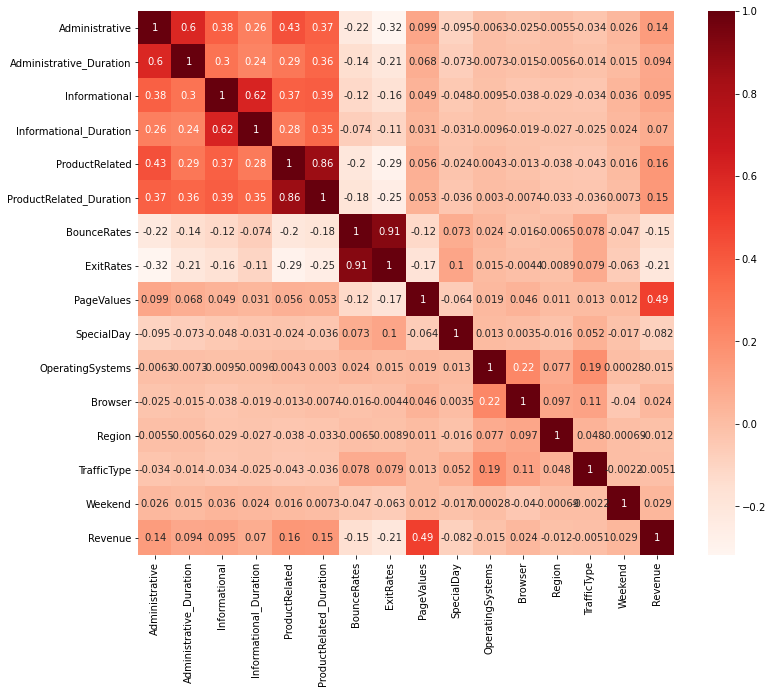

In [5]:
# Using Pearson Correlation for feature selection
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["Revenue"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.020]
relevant_features

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates                0.150673
ExitRates                  0.207071
PageValues                 0.492569
SpecialDay                 0.082305
Browser                    0.023984
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [7]:
df.drop(columns=["OperatingSystems","Region","TrafficType","VisitorType","Month"], inplace=True)

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,True,False


In [9]:
x=df.iloc[:,0:12].values
y=df.iloc[:,12].values

x[0]

array([0, 0.0, 0, 0.0, 1, 0.0, 0.2, 0.2, 0.0, 0.0, 1, False], dtype=object)

In [10]:
#Performing Normalization on data
st_x = StandardScaler()
x[:,0:10]=st_x.fit_transform(x[:,0:10])# Only first 10 columns are numerical data

In [11]:
x

array([[-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 1, False],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, False],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 1, False],
       ...,
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, True],
       [0.5072280472465313, -0.0329159174426107, -0.39647790101721353,
        ..., -0.3088213656157659, 2, False],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, True]], dtype=object)

In [12]:
# Label Encoding on Categorical feature 'weekend'
lb=LabelEncoder()
x[:,11]=lb.fit_transform(x[:,11])

In [13]:
x

array([[-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 1, 0],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, 0],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 1, 0],
       ...,
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, 1],
       [0.5072280472465313, -0.0329159174426107, -0.39647790101721353,
        ..., -0.3088213656157659, 2, 0],
       [-0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
        ..., -0.3088213656157659, 2, 1]], dtype=object)

In [14]:
lb1=LabelEncoder()
y=lb1.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
# Using one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer( transformers = [('encode', OneHotEncoder(),[10])], remainder = 'passthrough')

In [16]:
x=ct.fit_transform(x)

In [17]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       -0.6969929641233985, -0.4571914023726529, -0.39647790101721353,
       -0.24493050612963665, -0.6910031807070663, -0.6243475187901789,
       3.667188794132383, 3.229315594758881, -0.31717784430961626,
       -0.3088213656157659, 0], dtype=object)

In [18]:
#Splitting into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training data and 30% test data

# b) Training the 4 models 

In [19]:
# Training Decision Tree Classifier
d_tree = DecisionTreeClassifier() #Decision Tree object created
d_tree= d_tree.fit(x_train,y_train)

In [20]:
# Training Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt') # Classifier with 100 trees
rf.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [21]:
# Training SVM Classifier
sv_classifier = SVC(kernel='linear',probability = True)
sv_classifier.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [22]:
# Training k-NN Classifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#mlp classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [25]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [26]:
#Predicting Output labels for all models
y_pred1=d_tree.predict(x_test)
y_pred2= rf.predict(x_test)
y_pred3 = sv_classifier.predict(x_test)
y_pred4 = knn.predict(x_test)
y_pred5 = mlp.predict(x_test)
y_pred6 = mlp.predict(x_test)


In [27]:
# Printing accuracies for all
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))#Decision Tree
print(accuracy_score(y_test,y_pred2))#Random Forest
print(accuracy_score(y_test,y_pred3))#SVC
print(accuracy_score(y_test,y_pred4))#Knn
print(accuracy_score(y_test,y_pred5))#MLP
print(accuracy_score(y_test,y_pred6))#GB


0.8599621519329549
0.8983509056501757
0.8902406055690727
0.8769937821032712
0.8915923222492566
0.8915923222492566


# c) Confusion Matrices, accuracies and F1- Scores

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))#Confusion Matrix for Decision Tree
print(confusion_matrix(y_test,y_pred2))#Confusion Matrix for Random Forest
print(confusion_matrix(y_test,y_pred3))#Confusion Matrix for SVC
print(confusion_matrix(y_test,y_pred4))#Confusion Matrix for k-nn

[[2856  293]
 [ 256  294]]
[[3023  126]
 [ 256  294]]
[[3065   84]
 [ 322  228]]
[[2975  174]
 [ 281  269]]


In [84]:
# Printing accuracies for all
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))#Decision Tree
print(accuracy_score(y_test,y_pred2))#Random Forest
print(accuracy_score(y_test,y_pred3))#SVC
print(accuracy_score(y_test,y_pred4))#Knn

0.851581508515815
0.8967288456339552
0.8902406055690727
0.8769937821032712


In [85]:
# Printing f1 scores of all four models
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred1))#Decision Tree
print(f1_score(y_test,y_pred2))#Random Forest
print(f1_score(y_test,y_pred3))#SVC
print(f1_score(y_test,y_pred4))#k-nn

0.5171503957783641
0.6061855670103093
0.5290023201856148
0.5417925478348438


# ROC Curves for 4 models

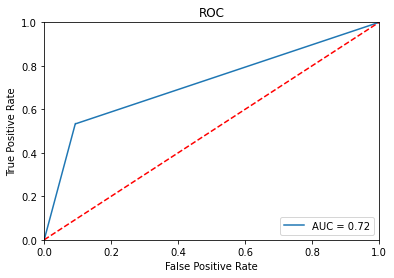

In [86]:
#ROC Plot for Decision Tree
ROC(d_tree,x_test,y_test)

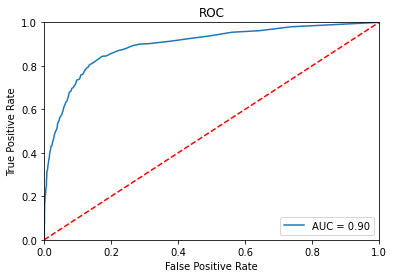

In [87]:
#ROC Plot for Random Forest
ROC(rf,x_test,y_test)

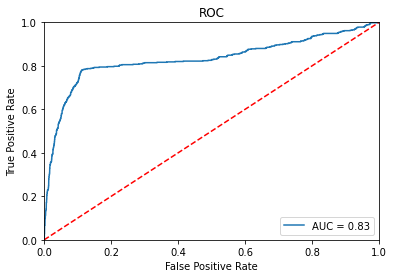

In [88]:
#ROC Plot for SVM
ROC(sv_classifier,x_test,y_test)

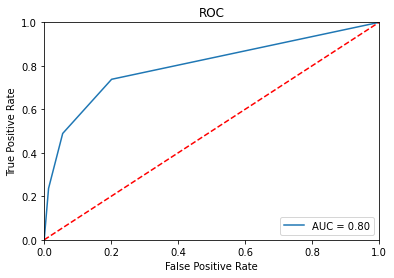

In [89]:
#ROC Plot for KNN
ROC(knn,x_test,y_test)

# e) Oversampling Minority Class using SMOTE

In [90]:
# Checking if output classes are evenly distributed in target class
unique, count = np.unique(y_train, return_counts= True)
class_dist = {k:v for (k,v) in zip(unique,count)}
class_dist

{0: 7273, 1: 1358}

In [91]:
# Using SMOTE to fix this imbalance in classes
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_sm,y_train_sm = smt.fit_resample(x_train,y_train)

In [92]:
# Checking if output classes are evenly distributed after SMOTE
unique, count = np.unique(y_train_sm, return_counts= True)
class_dist = {k:v for (k,v) in zip(unique,count)}
class_dist

{0: 7273, 1: 7273}

In [93]:
# Training Decision Tree Classifier
d_tree_sm = DecisionTreeClassifier() #Decision Tree object created
d_tree_sm= d_tree_sm.fit(x_train_sm,y_train_sm)

In [94]:
# Training Random Forest Classifier
rf_sm = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt') # Classifier with 100 trees
rf_sm.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_features='sqrt')

In [95]:
# Training SVM Classifier
sv_classifier_sm = SVC(kernel='linear',probability = True)
sv_classifier_sm.fit(x_train_sm,y_train_sm)

SVC(kernel='linear', probability=True)

In [96]:
# Training k-NN Classifier

knn_sm=KNeighborsClassifier(n_neighbors=3)
knn_sm.fit(x_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=3)

In [97]:
#Predicting Output labels for all models
y_pred1_sm=d_tree_sm.predict(x_test)
y_pred2_sm= rf_sm.predict(x_test)
y_pred3_sm = sv_classifier_sm.predict(x_test)
y_pred4_sm = knn_sm.predict(x_test)

In [98]:
#Printing F1 scores of all the models
print(f1_score(y_test,y_pred1_sm))#Decision Tree
print(f1_score(y_test,y_pred2_sm))#Random Forest
print(f1_score(y_test,y_pred3_sm))#SVC
print(f1_score(y_test,y_pred4_sm))#k-nn

0.5349397590361447
0.645933014354067
0.6430868167202572
0.5201916495550992


In [99]:
#Printing Confusion matrices for all
print(confusion_matrix(y_test,y_pred1_sm))#Confusion Matrix for Decision Tree
print(confusion_matrix(y_test,y_pred2_sm))#Confusion Matrix for Random Forest
print(confusion_matrix(y_test,y_pred3_sm))#Confusion Matrix for SVC
print(confusion_matrix(y_test,y_pred4_sm))#Confusion Matrix for k-nn

[[2787  362]
 [ 217  333]]
[[2850  299]
 [ 145  405]]
[[2855  294]
 [ 150  400]]
[[2618  531]
 [ 170  380]]


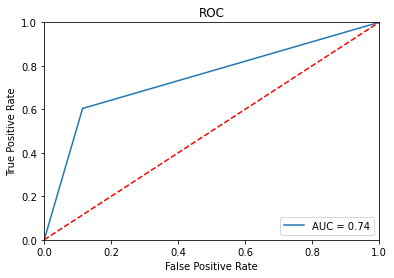

In [100]:
#ROC Plot for Decision Tree
ROC(d_tree_sm,x_test,y_test)

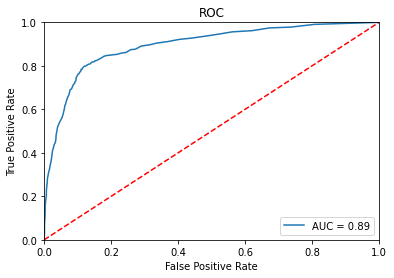

In [101]:
#ROC Curve for Random Forest
ROC(rf_sm,x_test,y_test)

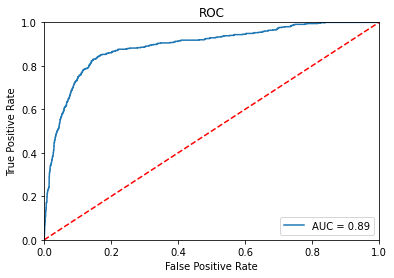

In [102]:
#ROC Curve for SVC
ROC(sv_classifier_sm,x_test,y_test)

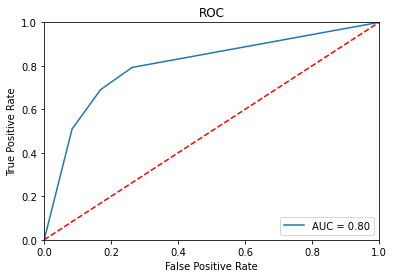

In [103]:
#ROC Curve for knn
ROC(knn_sm,x_test,y_test)

# f) Undersampling Majority Class - Tomek Links

In [104]:
# Using Technique 2 - Undersampling Majority Class
# Checking class distributions again
unique, count = np.unique(y_train, return_counts= True)
class_dist = {k:v for (k,v) in zip(unique,count)}
class_dist

{0: 7273, 1: 1358}

In [105]:
# Using Tomek Links to undersample majority class
from imblearn.under_sampling import TomekLinks
tmk=TomekLinks()
x_train_tmk, y_train_tmk = tmk.fit_resample(x_train,y_train)

In [106]:
unique, count = np.unique(y_train_tmk, return_counts= True)
class_dist = {k:v for (k,v) in zip(unique,count)}
class_dist

{0: 6984, 1: 1358}

In [107]:
# Training Decision Tree Classifier
d_tree_tmk = DecisionTreeClassifier() #Decision Tree object created
d_tree_tmk= d_tree_tmk.fit(x_train_tmk,y_train_tmk)

In [108]:
# Training Random Forest Classifier
rf_tmk = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt') # Classifier with 100 trees
rf_tmk.fit(x_train_tmk,y_train_tmk)

RandomForestClassifier(max_features='sqrt')

In [109]:
# Training SVM Classifier
sv_classifier_tmk = SVC(kernel='linear',probability = True)
sv_classifier_tmk.fit(x_train_tmk,y_train_tmk)

SVC(kernel='linear', probability=True)

In [110]:
# Training k-NN Classifier

knn_tmk=KNeighborsClassifier(n_neighbors=3)
knn_tmk.fit(x_train_tmk,y_train_tmk)

KNeighborsClassifier(n_neighbors=3)

In [111]:
#Predicting Output labels for all models
y_pred_tmk1=d_tree_tmk.predict(x_test)
y_pred_tmk2= rf_tmk.predict(x_test)
y_pred_tmk3 = sv_classifier_tmk.predict(x_test)
y_pred_tmk4 = knn_tmk.predict(x_test)

In [112]:
print(f1_score(y_test,y_pred_tmk1))#Decision Tree
print(f1_score(y_test,y_pred_tmk2))#Random Forest
print(f1_score(y_test,y_pred_tmk3))#SVC
print(f1_score(y_test,y_pred_tmk4))#k-nn

0.5472803347280335
0.622568093385214
0.5841269841269842
0.5625000000000001


In [113]:
print(accuracy_score(y_test,y_pred_tmk1))#Decision Tree
print(accuracy_score(y_test,y_pred_tmk2))#Random Forest
print(accuracy_score(y_test,y_pred_tmk3))#SVC
print(accuracy_score(y_test,y_pred_tmk4))#Knn

0.8537442552041092
0.8951067856177345
0.8937550689375506
0.8751013787510138


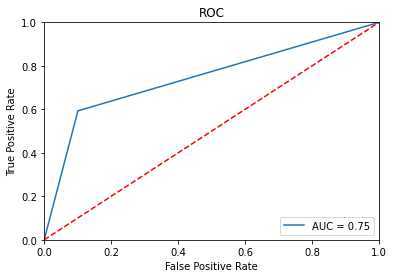

In [114]:
#ROC Curve for Decision Tree
ROC(d_tree_tmk,x_test,y_test)

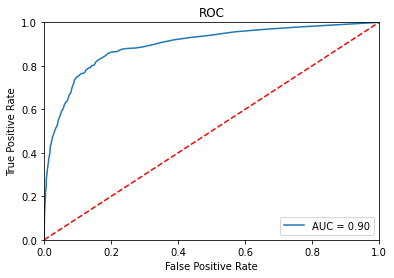

In [115]:
#ROC Curve for Random Forest
ROC(rf_tmk,x_test,y_test)

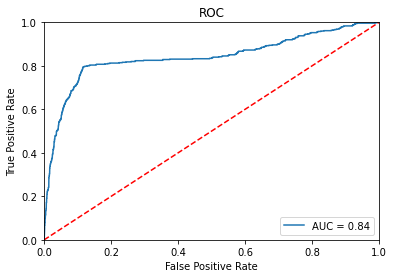

In [116]:
#ROC for SVC
ROC(sv_classifier_tmk,x_test,y_test)

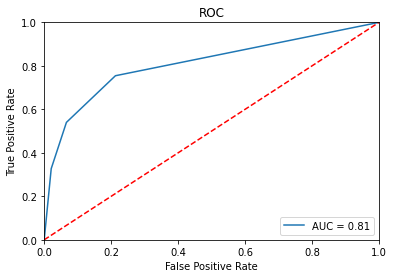

In [117]:
#ROC for knn
ROC(knn_tmk,x_test,y_test)

In [118]:
#Confusion matrices for all models
print(confusion_matrix(y_test,y_pred_tmk1))#Confusion Matrix for Decision Tree
print(confusion_matrix(y_test,y_pred_tmk2))#Confusion Matrix for Random Forest
print(confusion_matrix(y_test,y_pred_tmk3))#Confusion Matrix for SVC
print(confusion_matrix(y_test,y_pred_tmk4))#Confusion Matrix for k-nn

[[2831  318]
 [ 223  327]]
[[2991  158]
 [ 230  320]]
[[3030  119]
 [ 274  276]]
[[2940  209]
 [ 253  297]]


In [119]:
#Accuracy of SMOTE() Missed above
print(accuracy_score(y_test,y_pred1_sm))#Decision Tree
print(accuracy_score(y_test,y_pred2_sm))#Random Forest
print(accuracy_score(y_test,y_pred3_sm))#SVC
print(accuracy_score(y_test,y_pred4_sm))#Knn

0.8434712084347121
0.8799675587996756
0.8799675587996756
0.8104893214382265
